# Oscar De la Cruz Echevetse

# Tarea 2: Mecánica Analítica

## 1. El péndulo forzado amortiguado

## Instrucciones:

La ecuación del péndulo forzado amortiguado es

    Aceleración+Amortiguamiento+Gravedad=Fuerza externa

Que como ecuación se ve:

\begin{equation}
\ddot \theta + \mu \dot\theta + sin(\theta) = Acos(\omega_d t)
\end{equation}

donde hemos normalizado el tiempo para que la frencuencia natural sea 1.

Límite lineal. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular tiene una función coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomando $A=1$ y $\mu=0.05$

## CODIGO

In [1]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

### Problemas a resolver:

### a) Graficar la Amplitud como función de la frecuencia de la fuerza externa.

La solución particular vista en clase es:

\begin{equation}
\theta_p(t)=\frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2 + 4\omega_d^2\beta^2}} \cos(\omega_dt-\delta)
\end{equation}

Así definimos:
\begin{equation}
Amplitud = \frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2 + 4\omega_d^2\beta^2}}
\end{equation}

La cual defino como función en la siguiente linea de codigo:

In [2]:
#definimos función para la amplitud:
def amplitud (dat):
    omg = dat[0]  #frecuencia de la fuerza externa.
    mu = dat[1]  
    omg0 = dat[2] #frencuencia natural
    arg = pow(pow(pow(omg0,2)-pow(omg,2),2)+pow(omg*mu,2),0.5)
    return np.divide( 1 , arg )

Donde, en este caso: $\mu=2\beta=0.05$, $\omega_0=1$ y $A=1$. 

\begin{equation}
Amplitud = \frac{1}{\sqrt{(1-\omega_d^2)^2 + \omega_d^2\mu^2}}
\end{equation}

Así calculamos la amplitud en las siguientes líneas de codigo:

In [3]:
omg_0 = 1
mu = 0.05
ffe = np.linspace(omg_0 - 1, omg_0 + 2, 10000) #ffe= frecuencia de la fuerza externa.
dats = np.array([ffe , mu , omg_0])
amp = amplitud(dats)

La gráfica de la Amplitud como función de la frecuencia de la fuerza externa se verá como:

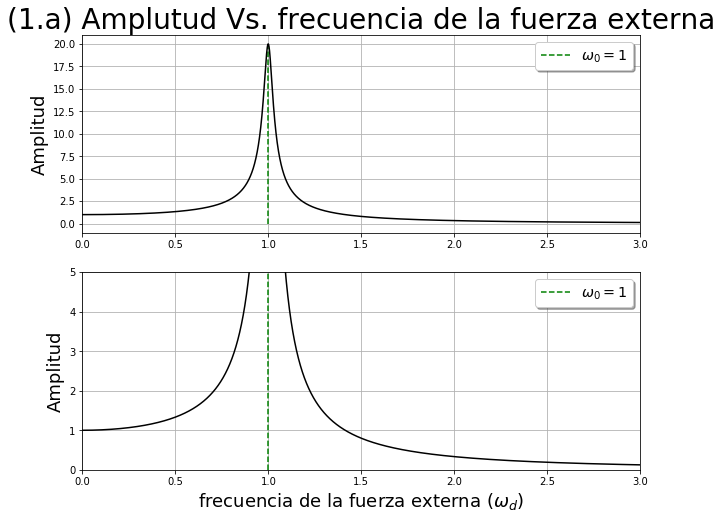

In [4]:
plt.figure(figsize=(10,8))
plt.xlim(np.amin(ffe),np.amax(ffe))

plt.subplot(2, 1, 1)
plt.title('(1.a) Amplutud Vs. frecuencia de la fuerza externa',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.ylabel("Amplitud",fontsize=18)
plt.xlim(np.amin(ffe),np.amax(ffe))
plt.plot(omg_0*np.ones(int(np.amax(amp))),np.linspace(0.0, int(np.amax(amp)),int( np.amax(amp))) , 'g--',label='$\omega_0={0}$'.format(omg_0))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.plot(ffe,amp, color='k')
plt.grid()

plt.subplot(2, 1, 2)
plt.xlabel("frecuencia de la fuerza externa $(\omega_d)$",fontsize=18)
plt.ylabel("Amplitud",fontsize=18)
plt.xlim(np.amin(ffe),np.amax(ffe))
plt.ylim(0,np.amax(amp)/4)
plt.plot(omg_0*np.ones(int(np.amax(amp))),np.linspace(0.0, int(np.amax(amp)),int( np.amax(amp))) , 'g--',label='$\omega_0={0}$'.format(omg_0))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.plot(ffe,amp, color='k')
plt.grid()

Donde vemos que el máximo de la amplitud esta en la frecuencia de fuerza extrema que es igual a la frecuencia natural, es decir : 

\begin{equation}
Amplitud_{max}=\omega_d = \omega_0
\end{equation}

#### b) Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.

La fase la podemos calcular con la siguiente expereción:

\begin{equation}
\delta =\tan^{-1} \left[ \frac{\mu\omega_d}{\omega_0^2 -\omega_d^2} \right]
\end{equation}

En la siguiente linea de codigo se define la exprecion anterior con una función:

In [5]:
def fase(dat):
    omg = dat[0]  #frecuencia de la fuerza externa.
    mu = dat[1]  
    omg0 = dat[2] #frencuencia natural
    arg = np.divide(mu*omg,pow(omg0,2)-pow(omg,2))
    return np.arctan(arg)

Entonces, calculamos la fase en función de la frecuemcia de fuerza externa "$ffe$":

In [6]:
ffe2 = np.linspace(-omg_0,omg_0, 10000) 
dats2 = np.array([ffe2,mu,omg_0]) 
fass = fase(dats2)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Nota: La función np.arctang devolverá valores entre $\pi/2<\delta<\pi/2$ por lo que la moveré $\pi/2$ hacia arriba

Y graficamos la funcón:

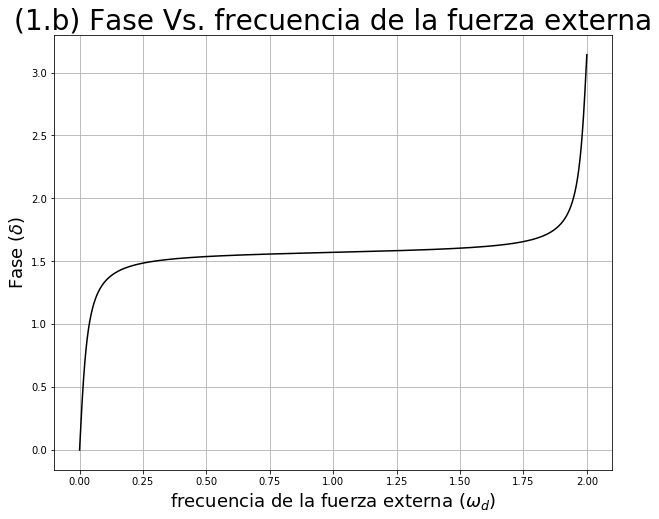

In [7]:
plt.figure(figsize=(10,8))
plt.title('(1.b) Fase Vs. frecuencia de la fuerza externa',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.xlabel("frecuencia de la fuerza externa $(\omega_d)$",fontsize=18)
plt.ylabel("Fase $(\delta)$",fontsize=18)
plt.plot(ffe2 + np.amax(ffe2),fass + np.amax(fass), color='k')
plt.grid()
plt.show()

#### c) Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.

Usando la solución:
\begin{equation}
\theta_p(t)=\frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2 + \omega_d^2\mu^2}} \cos(\omega_dt-\delta)
\end{equation}

Tomando: $A=1$, $\omega_0=1$, $\mu=0.05$

Y al ser $\omega_0 > \mu^2/4$ la solución a la ecuación homogenea es un oscilador inframortiguado, es decir:

\begin{equation}
\theta_h(t) = B e^{\frac{-\mu t}{2}}\cos\left(\sqrt{1 - \frac{\mu^2}{4}} t + \delta\right)
\end{equation}

\begin{equation}
\Rightarrow \theta(t) = \frac{1}{\sqrt{(1-\omega_d^2)^2 + \omega_d^2\mu^2}} \cos(\omega_dt+\delta) + B e^{\frac{-\mu t}{2}}\cos\left(\sqrt{1 - \frac{\mu^2}{4}} t + \delta\right)
\end{equation}



In [8]:
def fase(dat):
    omg = dat[0]  #frecuencia de la fuerza externa.
    mu = dat[1]  
    omg0 = dat[2] #frencuencia natural
    arg = np.divide(mu*omg,pow(omg0,2)-pow(omg,2))
    return np.arctan(arg)

In [9]:
def B_c(datos,delta):
    omgd,mu,omg0,omg1,th_i,thp_i = datos
    N_1 = pow(pow(omg0**2 - omgd**2,2) + omgd**2*mu**2,0.5)
    N_2 = (th_i/(math.cos(delta))) - (thp_i*N_1)/(omgd*math.sin(delta))
    N_3 = 1 - (N_1/omgd)*((mu/(2*math.tan(delta)))+omg1)
    return (N_2/N_3) 
    

In [10]:
def A_c(datos,delta,B):
    omgd,mu,omg0,omg1,th_i,thp_i= datos
    N_1 = pow(pow(omg0**2 - omgd**2,2) + omgd**2*mu**2,0.5)
    N_2 = (thp_i*N_1)/(omgd*math.sin(delta))
    N_3 = (N_1/omgd)*((mu/(2*math.tan(delta)))+omg1)
    return N_2 - (B*N_3)

In [11]:
def sol_theta(datos,A,B,delta,t):
    omg,mu,omg0,omg1,th_i,thp_i = datos
    arg_1 = pow( pow(pow(omg0,2)-pow(omg,2),2)+pow(omg*mu,2) ,0.5)
    ampl = A/arg_1
    homo = B*np.exp(-mu*t*0.5)*np.cos(omg1*t + delta)
    return ampl*np.cos((omg*t)+delta)+ homo

In [12]:
def sol_theta_p(datos,A,B,delta,t):
    omg,mu,omg0,omg1,th_i,thp_i = datos
    arg_1 = pow( pow(pow(omg0,2)-pow(omg,2),2)+pow(omg*mu,2) ,0.5)
    ampl = A/arg_1
    homo = -mu*0.5*B*np.exp(-mu*t*0.5)*np.cos(omg1*t + delta) - omg1*B*np.exp(-mu*t*0.5)*np.sin(omg1*t + delta)
    return -ampl*omg*np.sin((omg*t)+delta)+ homo

Condiciones iniciales de la primera trayectoria:

In [13]:
omg_01, mu1, th_i1= 0.8, 0.3, np.pi/9
omg_11 = pow(omg_01**2-mu1**2,0.5)
omg_d1 = omg_11/20
thp_i1 = omg_d1
datos_1 = np.array([omg_d1,mu1,omg_01,omg_11,th_i1,thp_i1])
delta_1 = fase(datos_1)
B_1 = B_c(datos_1,delta_1)
A_1 = A_c(datos_1,delta_1,B_1)

Condiciones iniciales de la segunda trayectoria:

In [14]:
omg_02, mu2, th_i2= 0.9, 0.5, np.pi/18
omg_12 = pow(omg_02**2-mu2**2,0.5)
omg_d2 = omg_12/4
thp_i2 = omg_d2
datos_2 = np.array([omg_d2,mu2,omg_02,omg_12,th_i2,thp_i2])
delta_2 = fase(datos_2)
B_2 = B_c(datos_2,delta_2)
A_2 = A_c(datos_2,delta_2,B_2)

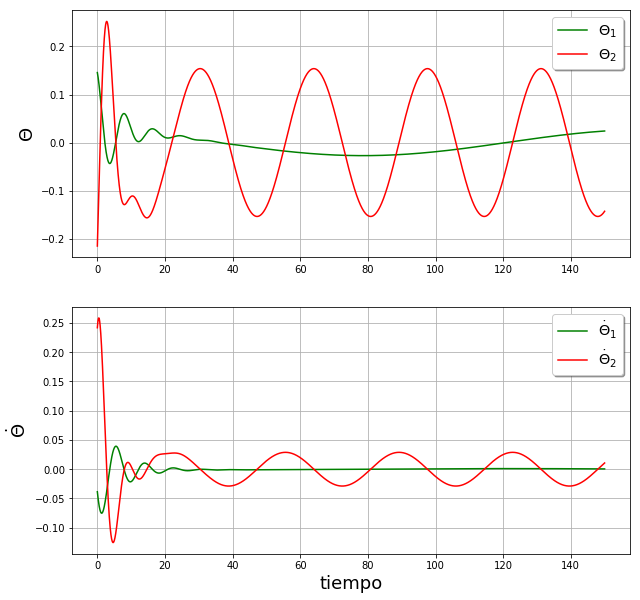

In [15]:
t=np.linspace(0, 150, 10000)
tha_1 = sol_theta(datos_1,delta_1,A_1,B_1,t)
tha_P1 = sol_theta_p(datos_1,delta_1,A_1,B_1,t)
tha_2 = sol_theta(datos_2,delta_2,A_2,B_2,t)
tha_P2 = sol_theta_p(datos_2,delta_2,A_2,B_2,t)

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.ylabel('$\Theta$',fontsize=18)
plt.plot(t,tha_1,'g',label='$\Theta_1$')
plt.plot(t,tha_2,'r',label='$\Theta_2$')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid()
plt.subplot(2, 1, 2)
plt.ylabel('$\dot\Theta$',fontsize=18)
plt.xlabel('tiempo', fontsize=18)
plt.plot(t,tha_P1,'g',label='$\dot\Theta_1$')
plt.plot(t,tha_P2,'r',label='$\dot\Theta_2$')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid()

plt.show()

### d) Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

In [16]:
omg_03, mu3, th_i3= 0.4, 0.1, np.pi/9 
omg_13 = pow(omg_03**2-mu3**2,0.5)
omg_d3 = omg_13/6
thp_i3 = omg_d3*1.5
datos_3 = np.array([omg_d3,mu3,omg_03,omg_13,th_i3,thp_i3])
delta_3 = fase(datos_3)
B_3 = B_c(datos_3,delta_3)
A_3 = A_c(datos_3,delta_3,B_3)

omg_04, mu4, th_i4= 1.8, 0.9, np.pi/16 
omg_14 = pow(omg_04**2-mu4**2,0.5)
omg_d4 = omg_14/1.5
thp_i4 = omg_d4/2
datos_4 = np.array([omg_d4,mu4,omg_04,omg_14,th_i4,thp_i4])
delta_4 = fase(datos_4)
B_4 = B_c(datos_4,delta_4)
A_4 = A_c(datos_4,delta_4,B_4)

t=np.linspace(0, 500, 10000)
tha_3 = sol_theta(datos_3,delta_3,A_3,B_3,t)
tha_P3 = sol_theta_p(datos_3,delta_3,A_3,B_3,t)
tha_4 = sol_theta(datos_4,delta_4,A_4,B_4,t)
tha_P4 = sol_theta_p(datos_4,delta_4,A_4,B_4,t)

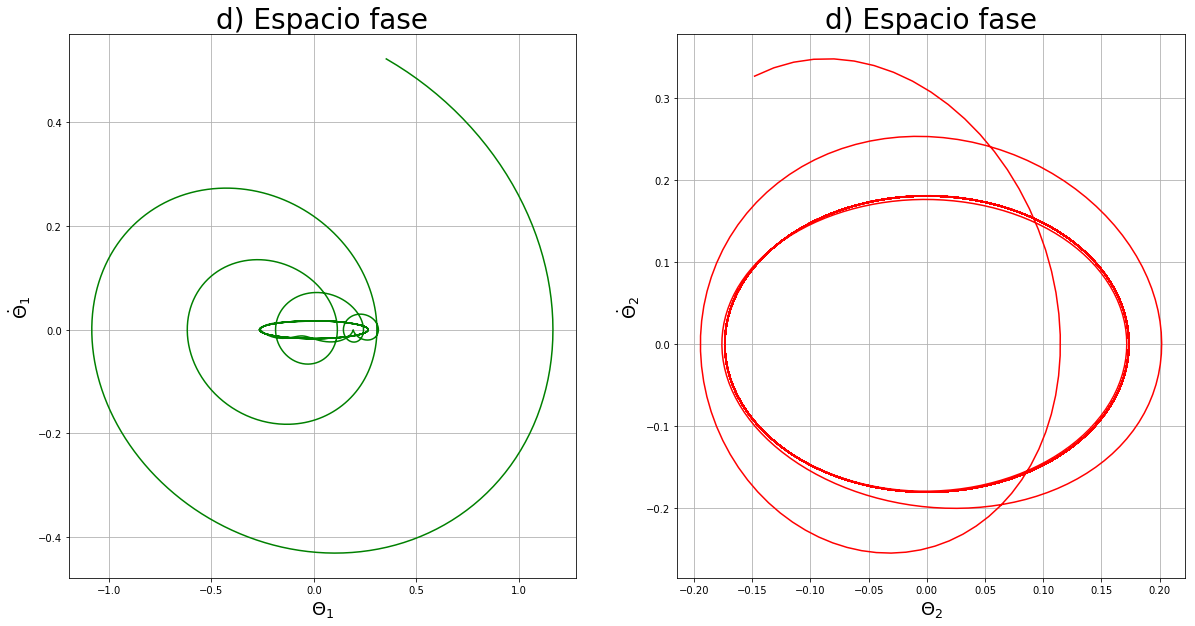

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('d) Espacio fase',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.ylabel('$\dot\Theta_1$',fontsize=18)
plt.xlabel('$\Theta_1$',fontsize=18)
plt.plot(tha_3,tha_P3,'g')
plt.grid()
plt.subplot(1, 2, 2)
plt.title('d) Espacio fase',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.ylabel('$\dot\Theta_2$',fontsize=18)
plt.xlabel('$\Theta_2$', fontsize=18)
plt.plot(tha_4,tha_P4,'r')
plt.grid()

In [18]:
def omega_d(omg0,mu,a,b):
    N_1 = b/((mu*a)+b)
    return pow(N_1,0.5)*omg0

In [19]:
def sol_th(datos,A,t):
    omgd,mu,omg0= datos
    delta = fase(datos_3)
    arg = pow( pow(pow(omg0,2)-pow(omgd,2),2)+pow(omgd*mu,2) ,0.5)
    ampl = A/arg
    return ampl*np.cos((omgd*t)-delta)

In [20]:
def dsol_th(datos,A,t):
    omgd,mu,omg0= datos
    delta = fase(datos_3)
    arg = pow( pow(pow(omg0,2)-pow(omgd,2),2)+pow(omgd*mu,2) ,0.5)
    ampl = A/arg
    return -omgd*ampl*np.sin((omgd*t)-delta)

In [21]:
#condiciones iniciales (1) :
omg_01 , mu_1 , A = 1 , 0.05 , 1
ang_ini_1 = np.pi/18
dang_ini_1 = 2*np.pi/(50)
omgd_1 = omega_d(omg_01,mu_1,ang_ini_1,dang_ini_1)
datos_1 = np.array([omgd_1,mu_1,omg_01]) 
t_1 = np.linspace(0,50,500)
sol_th_1 =  sol_th(datos_1, A, t_1)
dsol_th_1 =  dsol_th(datos_1, A, t_1)

In [22]:
#condiciones iniciales (2) :
omg_02 , mu_2 , A = 1 , 0.05 , 1
ang_ini_2 = np.pi/15
dang_ini_2 = 2*np.pi/(10)
omgd_2 = omega_d(omg_02,mu_2,ang_ini_2,dang_ini_2)
datos_2 = np.array([omgd_2,mu_2,omg_02]) 
t_2 = np.linspace(0,50,500)
sol_th_2 =  sol_th(datos_2, A, t_2)
dsol_th_2 =  dsol_th(datos_2, A, t_2)

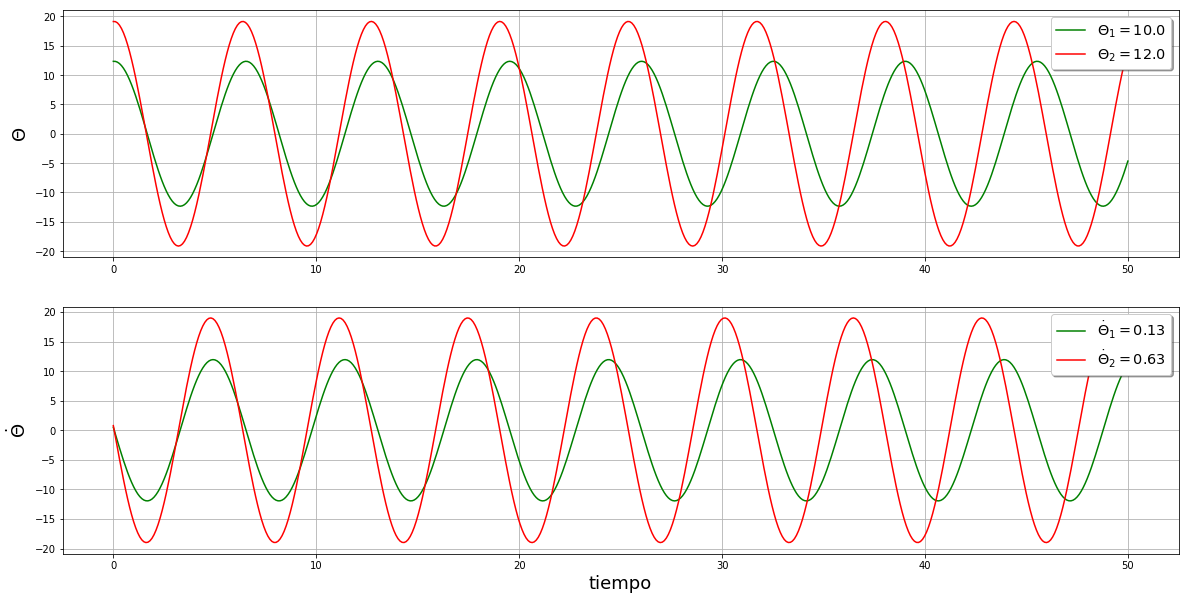

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.ylabel('$\Theta$',fontsize=18)
plt.plot(t_1,sol_th_1,'g',label='$\Theta_1={:.1f}$'.format(ang_ini_1*180/np.pi))
plt.plot(t_2,sol_th_2,'r',label='$\Theta_2={:.1f}$'.format(ang_ini_2*180/np.pi))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid()
plt.subplot(2, 1, 2)
plt.ylabel('$\dot\Theta$',fontsize=18)
plt.xlabel('tiempo', fontsize=18)
plt.plot(t_1,dsol_th_1,'g',label='$\dot\Theta_1={:.2f}$'.format(dang_ini_1))
plt.plot(t_2,dsol_th_2,'r',label='$\dot\Theta_2={:.2f}$'.format(dang_ini_2))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid()

### e) Graficar en el espacio fase 2 trayectorias con 2 A's distintas, $\mu=0.05$ y la misma confición inicial.

In [24]:
#condiciones iniciales (3) :
omg_03 , mu_3 , A_3 = 1 , 0.05 , 0.23
ang_ini_3 = np.pi/18
dang_ini_3 = 2*np.pi/(50)
omgd_3 = omega_d(omg_03,mu_3,ang_ini_3,dang_ini_3)
datos_3 = np.array([omgd_3,mu_3,omg_03]) 
t_3 = np.linspace(0,50,500)
sol_th_3 =  sol_th(datos_3, A_3, t_3)
dsol_th_3 =  dsol_th(datos_3, A_3, t_3)

In [25]:
#condiciones iniciales (4) :
omg_04 , mu_4 , A_4 = 1 , 0.05 , 1.4
ang_ini_4 = np.pi/18
dang_ini_4 = 2*np.pi/(50)
omgd_4 = omega_d(omg_04,mu_4,ang_ini_4,dang_ini_4)
datos_4 = np.array([omgd_4,mu_4,omg_04]) 
t_4 = np.linspace(0,50,500)
sol_th_4 =  sol_th(datos_4, A_4, t_4)
dsol_th_4 =  dsol_th(datos_4, A_4, t_4)

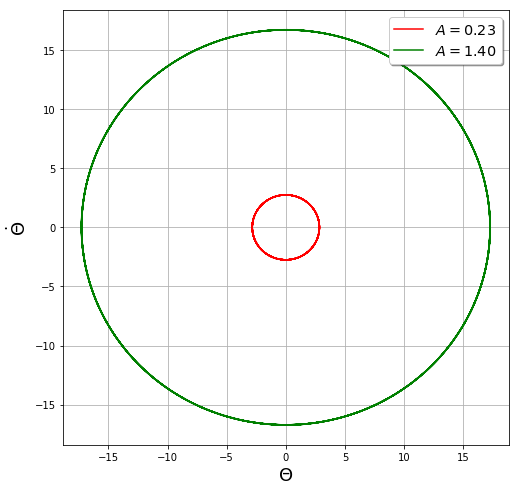

In [26]:
plt.figure(figsize=(8,8))
plt.ylabel('$\dot\Theta$',fontsize=18)
plt.xlabel('$\Theta$', fontsize=18)
plt.plot(sol_th_3, dsol_th_3 ,'r',label='$A={:.2f}$'.format(A_3))
plt.plot(sol_th_4,dsol_th_4,'g',label='$A={:.2f}$'.format(A_4))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.axis('equal')
plt.grid()

f) Graficar en el espacio fase 2 trayectorias con $2\mu's$ distintas, $A=1$ y la misma confición inicial.

In [27]:
#condiciones iniciales (5) :
omg_05 , mu_5 , A_5 = 1 , 0.5 , 1
ang_ini_5 = np.pi/18
dang_ini_5 = 2*np.pi/(50)
omgd_5 = omega_d(omg_05,mu_5,ang_ini_5,dang_ini_5)
datos_5 = np.array([omgd_5,mu_5,omg_05]) 
t_5 = np.linspace(0,50,500)
sol_th_5 =  sol_th(datos_5, A_5, t_5)
dsol_th_5 =  dsol_th(datos_5, A_5, t_5)

In [28]:
#condiciones iniciales (6) :
omg_06 , mu_6 , A_6 = 1 , 0.89 , 1
ang_ini_6 = np.pi/18
dang_ini_6 = 2*np.pi/(50)
omgd_6 = omega_d(omg_06,mu_6,ang_ini_6,dang_ini_6)
datos_6 = np.array([omgd_6,mu_6,omg_06]) 
t_6 = np.linspace(0,50,500)
sol_th_6 =  sol_th(datos_6, A, t_6)
dsol_th_6 =  dsol_th(datos_6, A, t_6)

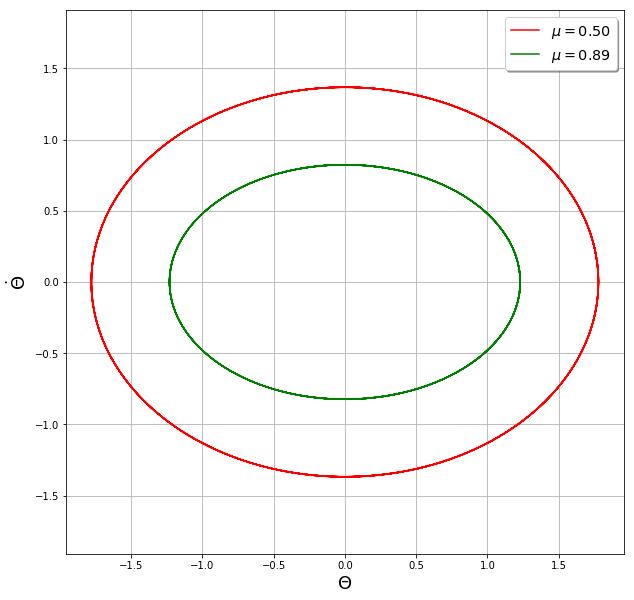

In [29]:
plt.figure(figsize=(10,10))
plt.ylabel('$\dot\Theta$',fontsize=18)
plt.xlabel('$\Theta$', fontsize=18)
plt.plot(sol_th_5, dsol_th_5 ,'r',label='$\mu={:.2f}$'.format(mu_5))
plt.plot(sol_th_6,dsol_th_6,'g',label='$\mu={:.2f}$'.format(mu_6))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.axis('equal')
plt.grid()

## 2. Ecuación no lineal no forzada sin amortiguamiento.

La ecuación tiene la forma:

\begin{equation}
\ddot \theta + \omega_0^2 sin(\theta) = 0
\end{equation}

### a) Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solucion numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.

Usando el cámbio de variable :

\begin{equation}
\omega = \dot\theta
\end{equation}

Tenemos entones una ecuaion diferencial más sencilla para encontrar la función $\omega$:

\begin{equation}
\Rightarrow \dot\omega = - \omega_0^2 sin(\theta)
\end{equation}

Donde, $\omega$ es la velocida angular.

En las siguiente linea de codigo se usa el modulo de odeint en la libreria scipy para encontrar la solución numérica de la ecuación diferencial:

In [30]:
def fun_nolin (con_iniciales, t, omg_0, b ):
    theta, omega = con_iniciales
    return [omega, - omg_0**2*np.sin(theta)]

Frecuencia natural unitaria: $\omega_0 = 1$.

Para un ángulo inicial de 70 grados $\theta(t=0)=70$ y velocidad angular $\omega(t=0)=0$ ya que parte del reposo

In [31]:
t = np.linspace(0, 50, 1000)
th_ini=70
dth_ini=0
b=0
omg_0=1
con_ini = [(th_ini*np.pi/180), dth_ini]
sol_nolin_2a = odeint(fun_nolin, con_ini, t, args=(omg_0 , b))

Para comparar la solucion anteriro con la solución a la ecuación linealizada defino una nueva función que es solución a la ecuación lineal, es decir:

\begin{equation}
\theta(t) = A' sin(\omega_0t - \delta)
\end{equation}

y la velocidad angular será:

\begin{equation}
\dot\theta(t) = A' \omega_0 cos(\omega_0t-\delta) 
\end{equation}

Siendo $A' = 0$ y $B'=70$ por las condiciones iniales.

In [32]:
def sol_lin(con_iniciales,omg0,t):
    th_ini , dth_ini = con_iniciales
    if th_ini == 0:
        delta = math.pi/2 
    else:
        delta = math.atan(-dth_ini/(th_ini*omg0)) 
    A = (th_ini)/math.cos(-delta)
    return A*np.cos(omg0*t- delta)

In [33]:
def dsol_lin(con_iniciales,omg0,t):
    th_ini , dth_ini = con_iniciales
    if th_ini == 0:
        delta = math.pi/2 
    else:
        delta = math.atan(-dth_ini/(th_ini*omg0))  
    A = (th_ini)/math.cos(-delta)
    return -omg0*A*np.sin(omg0*t- delta)

In [34]:
sol_lin_2a = sol_lin(con_ini,omg_0,t)
dsol_lin_2a = dsol_lin(con_ini,omg_0,t)

Comparamos las dos soluciones para el caso lineal y no linea:

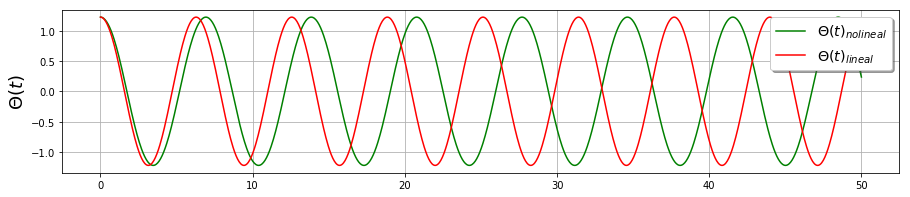

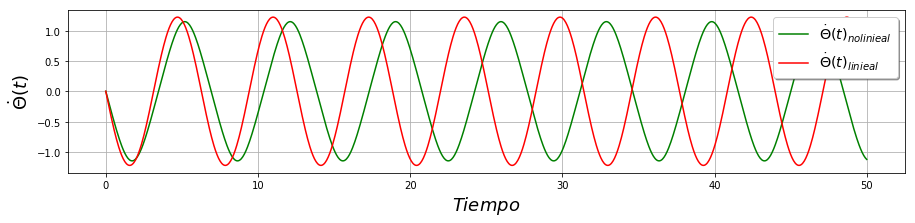

In [35]:
plt.figure(figsize=(15,3))
plt.plot(t,sol_nolin_2a[:, 0],'g',label='$\Theta(t)_{no lineal}$')
plt.plot(t,sol_lin_2a,'r',label='$\Theta(t)_{lineal}$')
plt.ylabel('$\Theta(t)$',fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid()
plt.show()

plt.figure(figsize=(15,3))
plt.plot(t, sol_nolin_2a[:, 1],'g',label='$\dot\Theta(t)_{no linieal}$' )
plt.plot(t,dsol_lin_2a,'r',label='$\dot\Theta(t)_{linieal}$')
plt.xlabel('$Tiempo$',fontsize=18)
plt.ylabel('$\dot\Theta(t)$',fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid()
plt.show()

Podemos observar la diferencia entre las soluciones de la ecuación lineal y la no lineal va siendo más grande a tiempos mayores. Por lo que con una condición inicial $\theta(t=0)$ grand la solución a la ecuación lineal deja de ser precisa.  

### b) Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una encontra de las manecillas del reloj y otra a favor.

Usando el mismo modulo odein y la misma función del inciso anterior para relorver la ecuación no lineal para distintos ángulos que van de -90 a 90 

In [36]:
th_i_2b = np.linspace (-90,90,10) #Arreglo con todos los ángulos 
dth_i_2b = np.zeros(len(th_i_2b)) #Arreglo con todas las velocidades iniciales = 0
omg_0=np.ones(len(th_i_2b)) #Arreglo con todas las frecuencias naturales iguales a 1
t = np.linspace(0, 200, 10000)
b = 0
sol_2b=[]
for i  in range(len(th_i_2b)):
    con_ini = [(th_i_2b[i]*np.pi/180) , dth_i_2b[i]]
    sol_2b.append(odeint(fun_nolin, con_ini, pow(-1,i)*t, args=(omg_0[i],b))) # el pow(-1,i) para crear trayectoria que caminen en sentido de las manesillas del reloj y en contra de ellas.
    

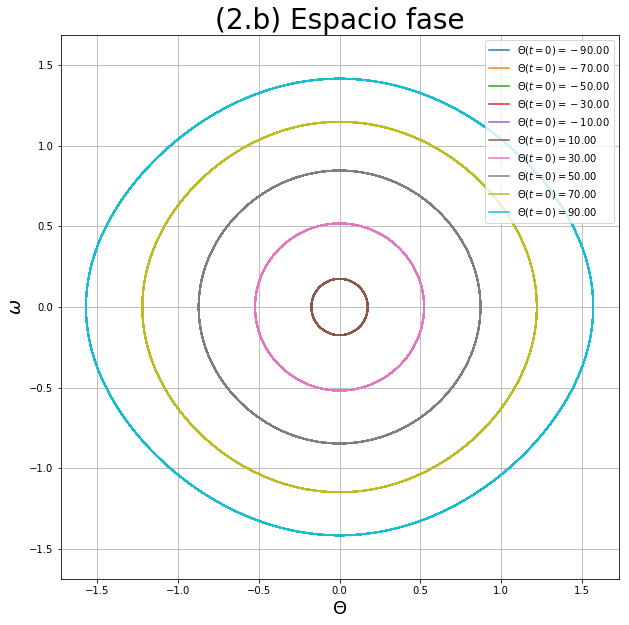

In [37]:
plt.figure(figsize=(10,10))
plt.title('(2.b) Espacio fase',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
for i  in range(len(th_i_2b)):
    plt.plot(sol_2b[i][:, 0], sol_2b[i][:, 1],label='$\Theta(t=0)={:.2f}$'.format(th_i_2b[i]))
plt.xlabel('$\Theta$',fontsize=18)
plt.ylabel('$\omega$',fontsize=18)
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

Sumamos dos trayectorias que den vueltas, una en contra de las manecillas del reloj y otra a favor.

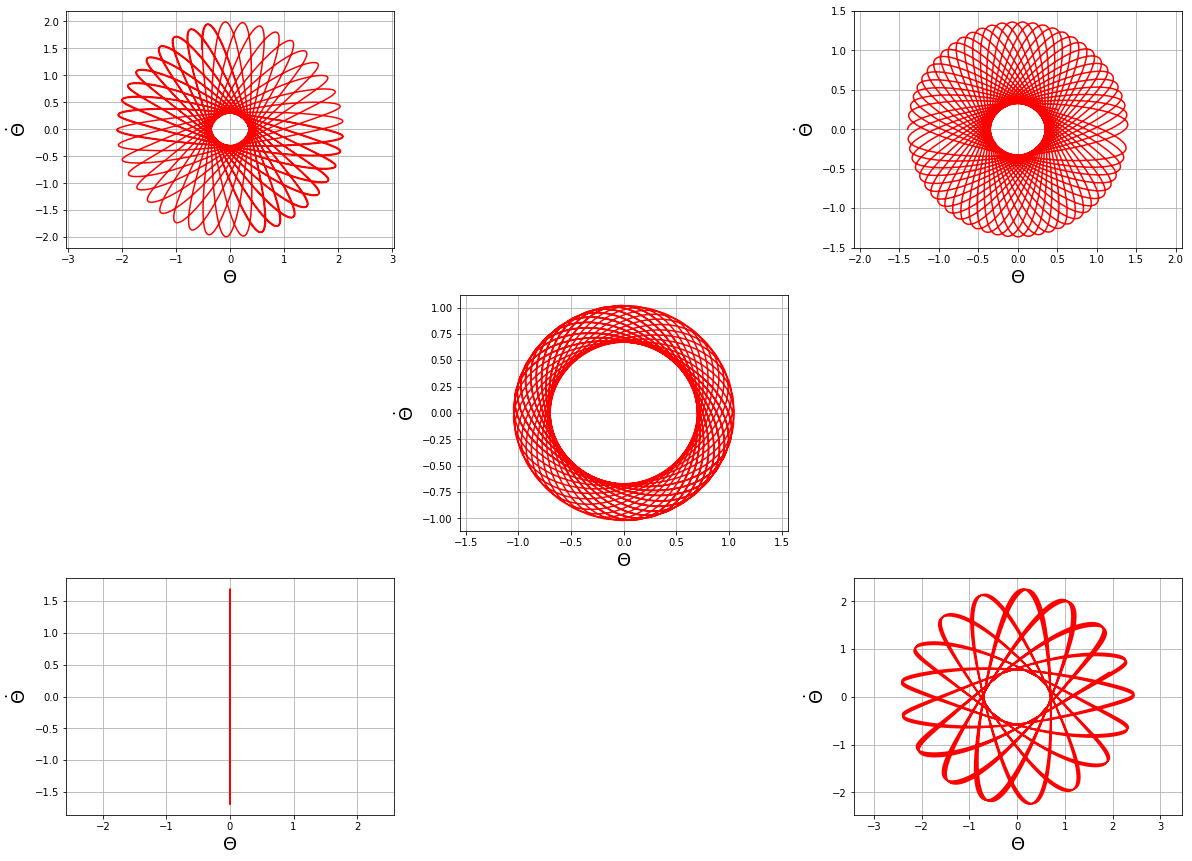

In [38]:
plt.figure(figsize=(20,20))
plt.title('b) Espacio fase',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
for j in range(10):
    if j%2!=0:
        plt.subplot(4, 3, j)
        plt.plot(sol_2b[2][:, 0] + sol_2b[j][:, 0], sol_2b[2][:, 1] + sol_2b[j][:, 1],'r')
        plt.xlabel('$\Theta$',fontsize=18)
        plt.ylabel('$\dot\Theta$',fontsize=18)
        plt.axis('equal')
        plt.grid()

plt.show()

## 3.- Ecuación no lineal amortiguada no forzada.

### a) Utiliza un parametro de amortiguamiento de 0.02, la frecuencia natural unitaria y observa cómo el espacio fase se distorciona. Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado

La ecuación del oscilador armonico amortiguado es la siguiente:

\begin{equation}
\ddot \theta + 2\beta \dot\theta + \omega_0^2 sin(\theta) = 0
\end{equation}

donde: $\beta$ es el parametro de amortiguamiento.

Se usara la misma fución con el comando 'odeint' con $b=2\beta\neq 0$

In [39]:
def fun_nolin_amor (con_iniciales, t, omg_0, mu):
    theta, omega = con_iniciales
    return [omega, -mu*omega - omg_0**2*np.sin(theta)]

In [40]:
th_i_3a = np.linspace (-90,90,10) # 10 grados iniciales diferentes que van desde -90 a 90 
dth_i_3a = np.zeros(len(th_i_3a )) # cada caso comensara en el reposo
omg_0 = np.ones(len(th_i_3a )) # 
t = np.linspace(0,200, 10000)
mu_3a=0.02
sol_3a=[]
for i  in range(len(th_i_3a )):
    con_ini = [(th_i_3a[i]*np.pi/180), dth_i_3a[i]]
    sol_3a.append(odeint(fun_nolin_amor, con_ini, t, args=(omg_0[i],mu_3a)))

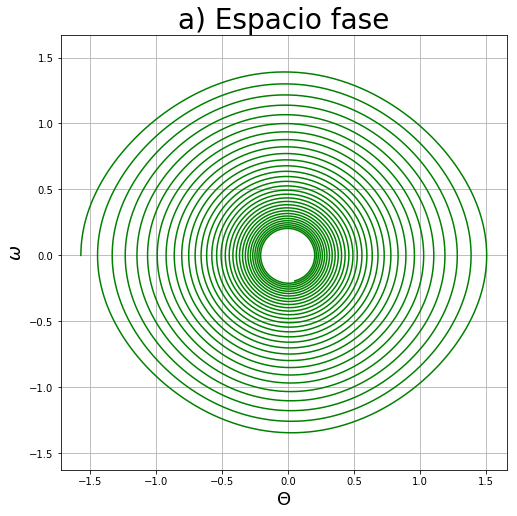

In [41]:
plt.figure(figsize=(8,8))
plt.title('a) Espacio fase',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.plot(sol_3a[0][:, 0], sol_3a[0][:, 1],'g' )
plt.xlabel('$\Theta$',fontsize=18)
plt.ylabel('$\omega$',fontsize=18)
plt.axis('equal')
plt.grid()
plt.show()

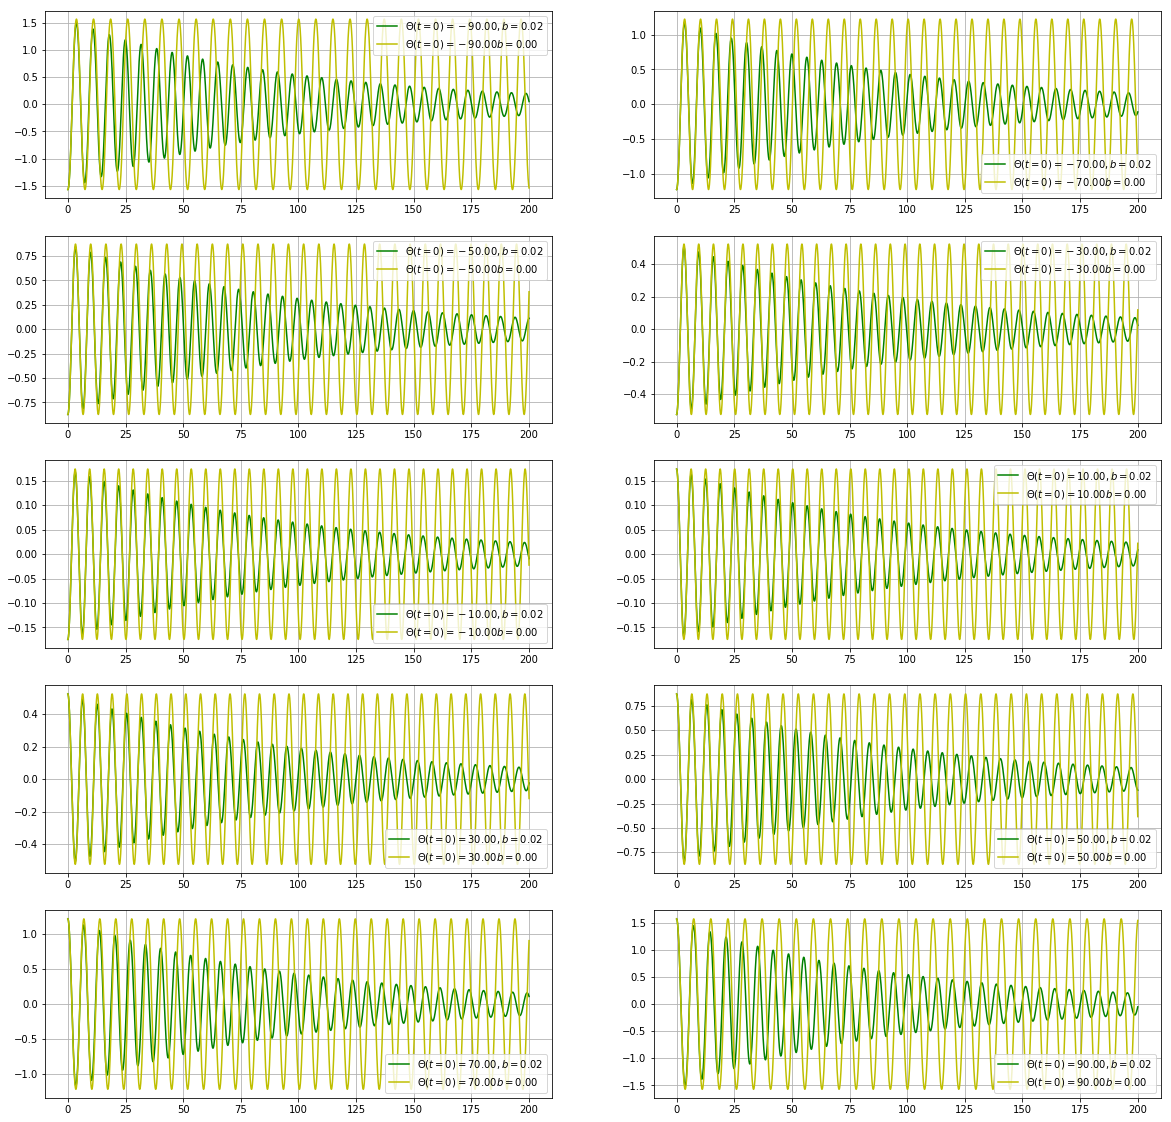

In [42]:
plt.figure(figsize=(20,20))
for j in range(10):
    plt.subplot(5, 2, j+1)
    plt.plot(t,sol_3a[j][:, 0],'g',label='$\Theta(t=0)={:.2f},b=0.02$'.format(th_i_3a[j]))
    plt.plot(t,sol_2b[j][:, 0],'y',label='$\Theta(t=0)={:.2f} b=0.00$'.format(th_i_2b[j]))
    plt.legend()
    plt.grid()

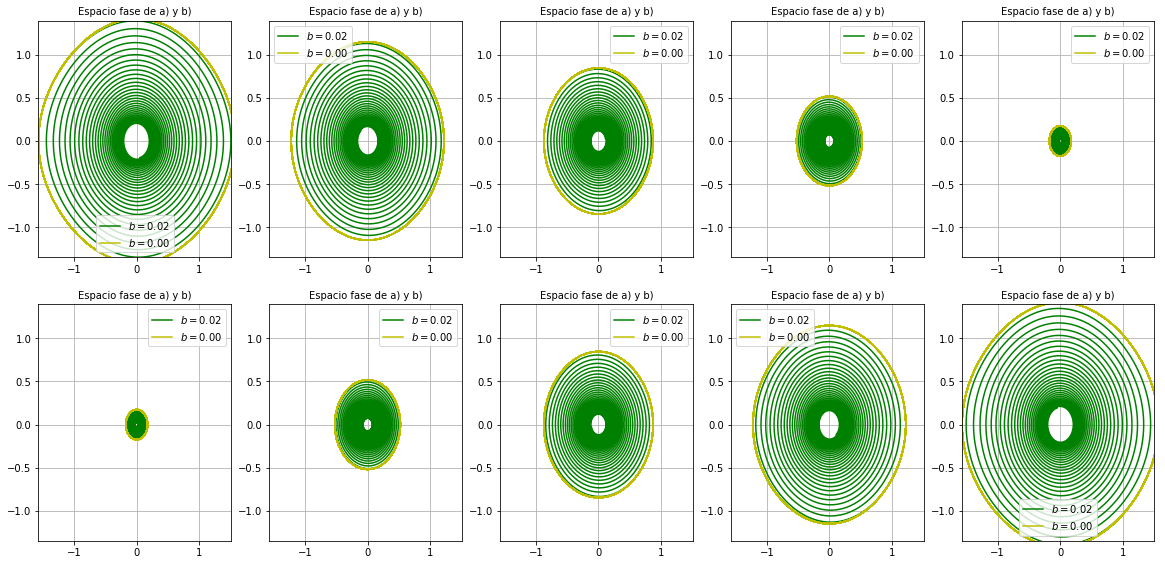

In [43]:
plt.figure(figsize=(20,20))
for j in range(10):
    plt.subplot(4, 5, j+1)
    plt.title('Espacio fase de a) y b)',fontsize = 10, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(np.amin(sol_3a[0][:, 0]),np.amax(sol_3a[0][:, 0]))
    plt.ylim(np.amin(sol_3a[0][:, 1]),np.amax(sol_3a[0][:, 1]))
    plt.plot(sol_3a[j][:, 0],sol_3a[j][:, 1],'g',label='$b=0.02$')
    plt.plot(sol_2b[j][:, 0],sol_2b[j][:, 1],'y',label='$b=0.00$')
    plt.legend()
    plt.grid()

In [44]:
def fun_comp (con_iniciales, t, b, omg_0, A, omg_d):
    theta, omega = con_iniciales
    return [omega, -b*omega - omg_0**2*np.sin(theta) + A*np.cos(omg_d*t)]

In [46]:
t = np.linspace(0, 50, 100000)
mu = 3*np.pi/2
omg_0 = 3*np.pi
omg_rep = 2*np.pi
grdo_i = -np.pi/2
A = []
omg_d = 4*np.pi/3
sol_4a = []

for i in range(6):
    A.append(float(input('Valor de A = ')))
    y0 = [grdo_i, omg_rep]
    sol_4a.append(odeint(fun_comp, y0, t, args=(mu,omg_0,A[i],omg_d)))

Valor de A = 1.05
Valor de A = 1.06
Valor de A = 1.08
Valor de A = 1.5
Valor de A = 2
Valor de A = 3


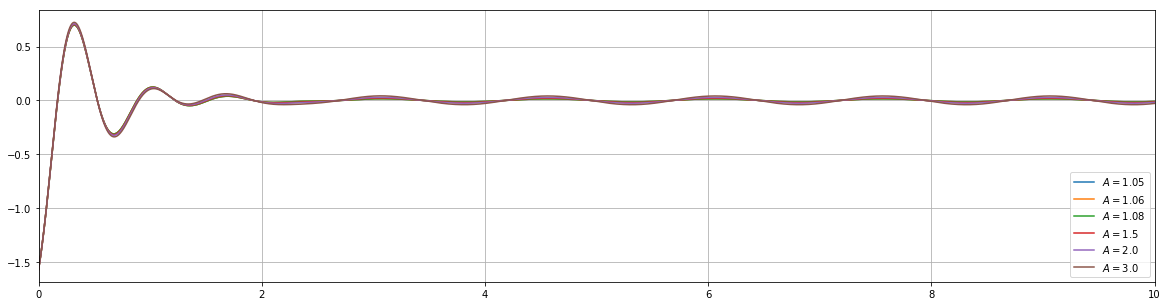

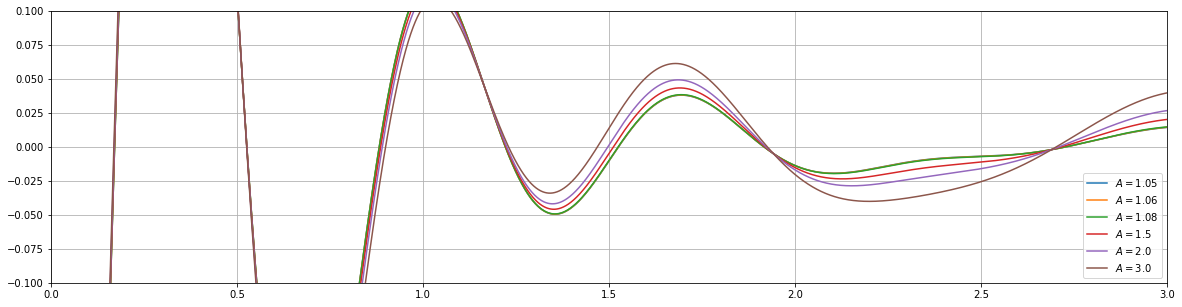

In [47]:
plt.figure(figsize=(20,5))
for j in range(6):
    plt.plot(t,sol_4a[j][:, 0],label='$A={0}$'.format(A[j]))
    plt.xlim(0,10)
    plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(20,5))
plt.ylim(-0.1,0.1)
for j in range(6):
    plt.plot(t,sol_4a[j][:, 0],label='$A={0}$'.format(A[j]))
    plt.xlim(0,3)
    plt.legend()
plt.grid()
plt.show()

###  b) Obten las trayectorias en el espacio fase de los casos del inciso anterior.

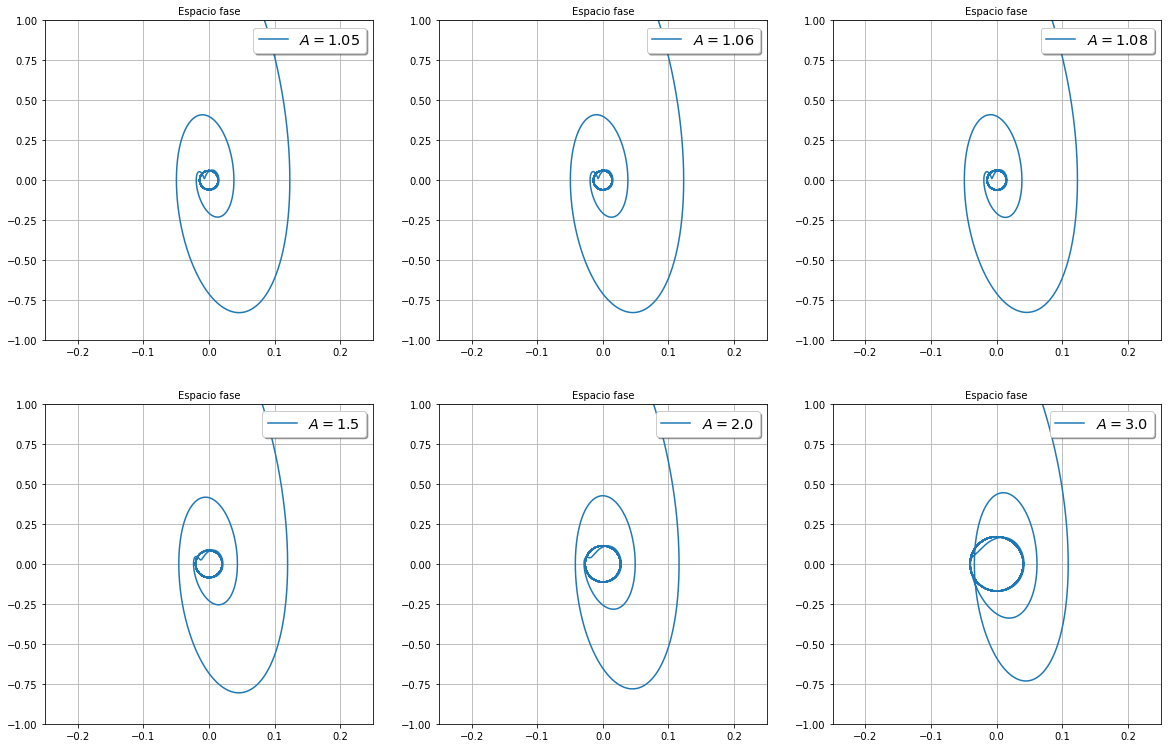

In [48]:
plt.figure(figsize=(20,20))
for j in range(len(sol_4a)):
    plt.subplot(3, 3, j+1)
    plt.title('Espacio fase',fontsize = 10, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.plot(sol_4a[j][:, 0],sol_4a[j][:, 1],label='$A={0}$'.format(A[j]))
    plt.xlim(-0.25,0.25)
    plt.ylim(-1,1)
    plt.legend(loc='upper right', shadow=True, fontsize='x-large')
    plt.grid()

## 4.- Ecuación no lineal completa.

### a) usando $\mu = 3\pi/2$, $\omega=2\pi$, $\omega_0 = 3\pi$,  grafica la solución para cinco casos de $A$ alrededor de $1.05$. Qué pasa con las soluciones. ¿Qué ocurre si $A=2$?

In [49]:
def fun_comp (con_iniciales, t, b, omg_0, A, omg_d):
    theta, omega = con_iniciales
    return [omega, -2*b*omega - omg_0**2*np.sin(theta) + A*omg_0**2*np.cos(omg_d*t)]

In [103]:
t = np.linspace(0, 6, 1000)
omg_rep = 0
grdo_i = -np.pi/2
omg_d = 2*np.pi
omg_0 = 1.5*omg_d
mu_5a = omg_0/8
A_5a = np.linspace(1.06,1.1,len(t))
sol_5a = []
y0 = [grdo_i , omg_rep]
for i in range(len(A_5a)):
    sol_5a.append(odeint(fun_comp, y0, t, args=(mu_5a,omg_0,A_5a[i],omg_d)))

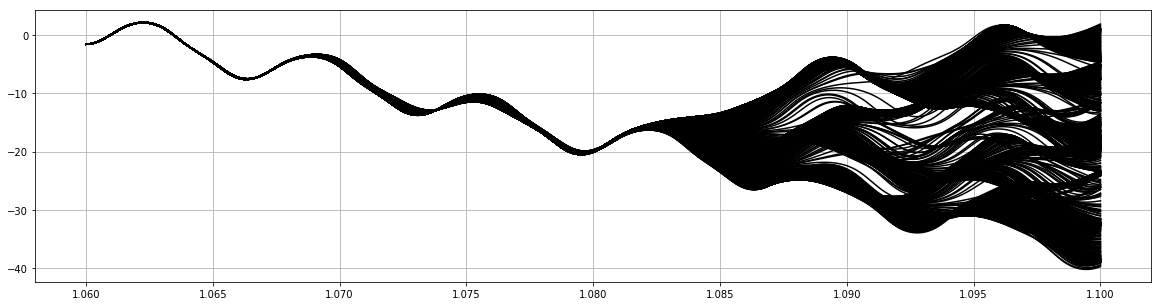

In [104]:
plt.figure(figsize=(20,5))
for i in range(len(A_5a)):
    plt.plot(A_5a,sol_5a[i][:,0],'k-')
#plt.xlim(1,1.05)
#plt.ylim(-0.25,0.25)
plt.grid()
plt.show()